In [32]:
import numpy as np
from matplotlib import pyplot as plt
import astropy

In [33]:
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 17

## On-Off Spectra

In [34]:
on_line = np.load('data/on_line.npy')
off_line = np.load('data/off_line.npy')

In [70]:
def calc_avg_power_fft(data):
    fft = np.fft.fft(data)
    pow_data = np.abs(fft)**2
    avg_data = np.mean(pow_data, axis=0)
    return np.fft.fftshift(avg_data)

def calc_freq(samples=16000, frequency=1/62.5):
    return np.fft.fftshift(np.fft.fftfreq(samples, d=frequency))

In [36]:
on_line.shape

(20000, 2048)

In [25]:
off_line.shape

(2048,)

(900, 1050)

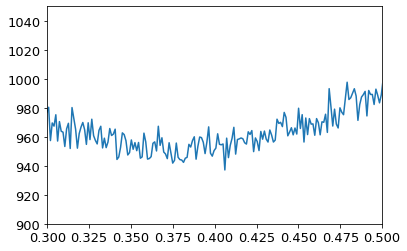

In [72]:
avg_fft = calc_avg_power_fft(on_line)
freq = calc_freq(samples=2048, frequency=1/2.2)
plt.plot(freq, avg_fft)
plt.xlim(0.3,0.5)
plt.ylim(900,1050)

In [31]:
avg_fft.shape

(2048,)

(950, 1050)

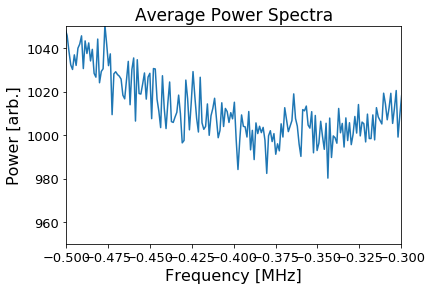

In [65]:
plt.plot(freq, np.fft.fftshift(off_line))
plt.title("Average Power Spectra")
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [arb.]')
plt.xlim(-0.5,-0.3)
plt.ylim(950,1050)

## Correct data!

In [73]:
on_line_blocks = np.load('data/on_line_raw.npy')
off_line_blocks = np.load('data/off_line_raw.npy')
on_line_pow_avg = np.load('data/on_line_pow_avg.npy')
off_line_pow_avg = np.load('data/off_line_pow_avg.npy')

# Raspberry Pi 2.2 MHz 2048 samples 
# 3:30pm zenith off/on
# on center frequency 1420 MHz, off center 1420.8 MHz
# 3:50pm blackbody observations

In [ ]:
plt.plot(freq, )

In [74]:
on_line_pow_avg.shape

(2048,)

In [ ]:
plt.plot(freq, )